###Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

###Importing dataset (from google drive)

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#dataset = pd.read_csv('./drive/My Drive/Project2_Sentiment_Analysis/a2_RestaurantReviews_FreshDump.tsv', delimiter = '\t', quoting = 3)
dataset = pd.read_csv('a2_RestaurantReviews_FreshDump.tsv', sep='\t')
dataset.head()

,Review
0,Spend your money elsewhere.
1,Their regular toasted bread was equally satisf...
2,The Buffet at Bellagio was far from what I ant...
3,"And the drinks are WEAK, people!"
4,-My order was not correct.


###Data cleaning

In [4]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12AU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
corpus=[]

for i in range(0, 100):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

###Data transformation

In [6]:
# Loading BoW dictionary
from sklearn.feature_extraction.text import CountVectorizer
import pickle
#cvFile='./drive/MyDrive/Project2_Sentiment_Analysis/c1_BoW_Sentiment_Model.pkl'
cvFile = 'c1_BoW_Sentiment_Model.pkl'
# cv = CountVectorizer(decode_error="replace", vocabulary=pickle.load(open('./drive/MyDrive/Colab Notebooks/2 Sentiment Analysis (Basic)/3.1 BoW_Sentiment Model.pkl', "rb")))
cv = pickle.load(open(cvFile, "rb"))


In [7]:
X_fresh = cv.transform(corpus).toarray()
X_fresh.shape

(100, 1420)

In [8]:
import joblib
model_lr = joblib.load('c4_Classifier_Sentiment_Model_LogR')

In [9]:
y_pred_lr = model_lr.predict(X_fresh)
print(y_pred_lr)

[0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]


In [10]:
dataset['predicted_label_lr'] = y_pred_lr.tolist()
dataset[['Review','predicted_label_lr']].head()

,Review,predicted_label_lr
0,Spend your money elsewhere.,0
1,Their regular toasted bread was equally satisf...,1
2,The Buffet at Bellagio was far from what I ant...,1
3,"And the drinks are WEAK, people!",1
4,-My order was not correct.,0


In [11]:
dataset['predicted_label_lr'].value_counts()

0    66
1    34
Name: predicted_label_lr, dtype: int64

<AxesSubplot:xlabel='predicted_label_lr', ylabel='count'>

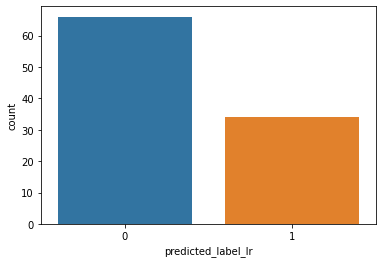

In [12]:
sns.countplot(x='predicted_label_lr', data=dataset)

In [13]:
dataset.to_csv('c5_Predicted_Sentiments_LogisticRegression_Fresh_Dump.tsv', sep='\t', encoding='UTF-8', index=False )

###Predictions (via sentiment classifier)

In [14]:
import joblib
#classifier = joblib.load('./drive/MyDrive/Project2_Sentiment_Analysis/c2_Classifier_Sentiment_Model')
classifier = joblib.load('c2_Classifier_Sentiment_Model')

In [15]:
y_pred = classifier.predict(X_fresh)
print(y_pred)

[0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [16]:
dataset['predicted_label'] = y_pred.tolist()
dataset[['Review','predicted_label']].head()

,Review,predicted_label
0,Spend your money elsewhere.,0
1,Their regular toasted bread was equally satisf...,1
2,The Buffet at Bellagio was far from what I ant...,1
3,"And the drinks are WEAK, people!",0
4,-My order was not correct.,0


In [17]:
dataset['predicted_label'].value_counts()

0    74
1    26
Name: predicted_label, dtype: int64

<AxesSubplot:xlabel='predicted_label', ylabel='count'>

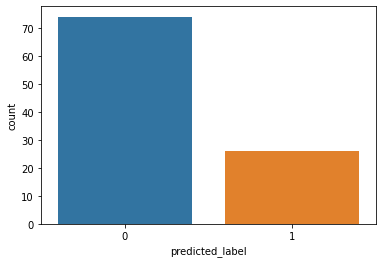

In [18]:
sns.countplot(x='predicted_label', data=dataset)

In [19]:
#dataset.to_csv("./drive/MyDrive/Project2_Sentiment_Analysis/c3_Predicted_Sentiments_Fresh_Dump.tsv", sep='\t', encoding='UTF-8', index=False)
dataset.to_csv('c3_Predicted_Sentiments_Fresh_Dump.tsv', sep='\t', encoding='UTF-8', index=False )

In [20]:
model_rf = joblib.load('c3_Classifier_Sentiment_Model_RandomForest')

In [21]:
y_pred_rf = model_rf.predict(X_fresh)
print(y_pred_rf)

[0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0]


In [27]:
dataset['predicted_label_rf'] = y_pred_rf.tolist()
dataset[['Review','predicted_label_rf']].head(2)

,Review,predicted_label_rf
0,Spend your money elsewhere.,0
1,Their regular toasted bread was equally satisf...,1


In [23]:
dataset['predicted_label_rf'].value_counts()

0    68
1    32
Name: predicted_label_rf, dtype: int64

<AxesSubplot:xlabel='predicted_label_rf', ylabel='count'>

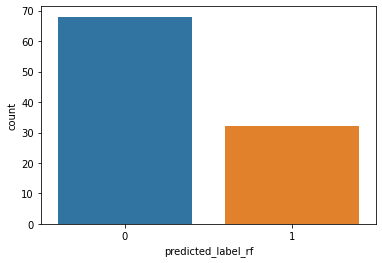

In [24]:
sns.countplot(x='predicted_label_rf', data = dataset)

In [26]:
dataset[['Review','predicted_label_rf']].to_csv('c4_Predicted_Sentiments_RandomForest_Fresh_Dump.tsv', sep='\t', encoding='UTF-8', index=False )